<a href="https://colab.research.google.com/github/AAADHIRAAA/Plastic-dataset/blob/main/mobilnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [36]:
def prepare_image(file):
    img_path = '/datalab/samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

from IPython.display import Image
Image(filename='/datalab/samples/cup.jpg', width=300,height=200)
preprocessed_image = prepare_image('cup.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

1/1 [==============================] - 0s 103ms/step


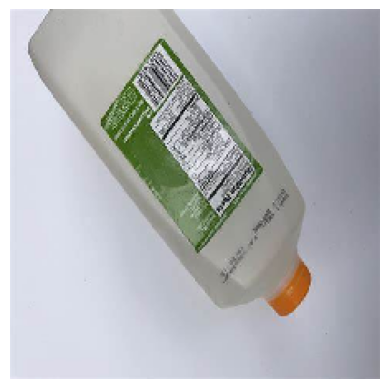

1/1 [==============================] - 1s 744ms/step
[[('n03690938', 'lotion', 0.7562917), ('n04357314', 'sunscreen', 0.10621922), ('n03937543', 'pill_bottle', 0.022467498), ('n03476991', 'hair_spray', 0.013642102), ('n03843555', 'oil_filter', 0.011853729)]]


In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
import matplotlib.pyplot as plt

mobile = tf.keras.applications.mobilenet.MobileNet(weights='imagenet')

def prepare_image(file):
    img_path = '/datalab/samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

# Display the image
img_path = '/datalab/samples/OIP.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

# Prepare and predict the image
preprocessed_image = prepare_image('OIP.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

print(results)


In [4]:
# Define directories for training and validation data
train_dir = 'sample_data/train'
validation_dir = 'sample_data/test'

# Image data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 5

# Generate batches of training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['recyclable_plastics', 'nonrecyclable_plastics', 'nonplastics']
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['recyclable_plastics', 'nonrecyclable_plastics', 'nonplastics']
)

# Load pre-trained MobileNet model
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False)

# Add custom classification head
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)  # Assuming 3 classes

# Combine base model and custom head
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)




Found 13 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


Epoch 1/10
2/2 [==============================] - 7s 3s/step - loss: 1.6941 - accuracy: 0.5000 - val_loss: 3.9529 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 2s 2s/step - loss: 2.2528 - accuracy: 0.5000 - val_loss: 0.9092 - val_accuracy: 0.6000
Epoch 3/10
2/2 [==============================] - 4s 3s/step - loss: 0.3398 - accuracy: 0.7500 - val_loss: 1.6246 - val_accuracy: 0.5333
Epoch 4/10
2/2 [==============================] - 2s 1s/step - loss: 0.2667 - accuracy: 0.7500 - val_loss: 1.4135 - val_accuracy: 0.5333
Epoch 5/10
2/2 [==============================] - 1s 837ms/step - loss: 0.4199 - accuracy: 0.9000 - val_loss: 1.0827 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 1s 771ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 1.1703 - val_accuracy: 0.6000
Epoch 7/10
2/2 [==============================] - 1s 793ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.5603 - val_accuracy: 0.6667
Epoch 8/10
2/2 [================